In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import LabelEncoder

In [2]:
# https://github.com/ml-tooling/best-of-ml-python
# https://pycaret.org/

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/ss_classifi/ss_classifi

/content/drive/MyDrive/ss_classifi/ss_classifi


In [36]:
data_raw = "./train_PTIT.csv"
df = pd.read_csv(data_raw)

In [37]:
df

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Genetic_Algorithms
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Rule_Learning
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Theory
2434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
2435,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks


In [38]:
print(df.iloc[:, :-1].shape, df.iloc[:, -1].shape)

(2437, 1433) (2437,)


<Axes: >

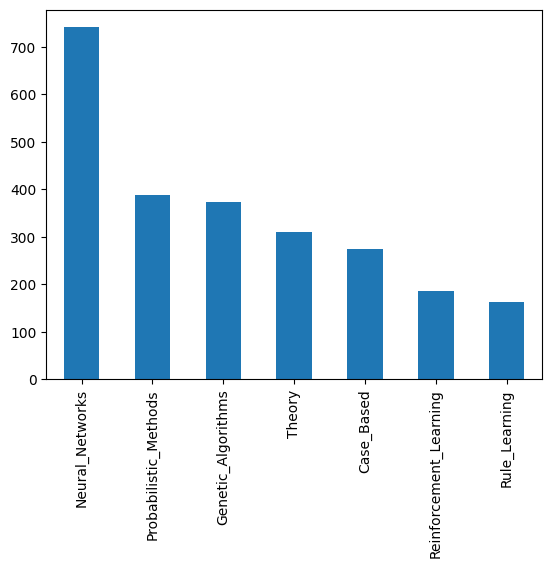

In [39]:
# visualize data
df["subject"].value_counts().plot(kind="bar")

In [40]:
df["subject"].unique()

array(['Probabilistic_Methods', 'Neural_Networks', 'Genetic_Algorithms',
       'Rule_Learning', 'Reinforcement_Learning', 'Case_Based', 'Theory'],
      dtype=object)

In [41]:
name_2_Id = {
    "Probabilistic_Methods": 0,
    "Neural_Networks": 1,
    "Genetic_Algorithms": 2,
    "Rule_Learning": 3,
    "Reinforcement_Learning": 4,
    "Case_Based": 5,
    "Theory": 6,
}

id_2_Name = {
    "0": "Probabilistic_Methods",
    "1": "Neural_Networks",
    "2": "Genetic_Algorithms",
    "3": "Rule_Learning",
    "4": "Reinforcement_Learning",
    "5": "Case_Based",
    "6": "Theory",
}

In [42]:
# preprocessing subject
df["subject"] = df["subject"].map(name_2_Id)
df

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2435,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
# check percent sparse of matrix
from numpy import count_nonzero
import numpy as np

A = df.iloc[:, :-1].values

# calculate sparsity
sparsity = 1.0 - ( count_nonzero(A) / float(A.size))
print(sparsity)

0.9873470207068796


In [44]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42
)

In [45]:
len(X_train)

1949

In [46]:
X_test.shape

(488, 1433)

# KNN

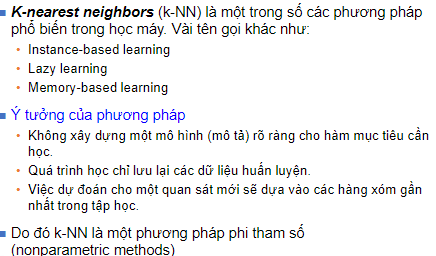

In [14]:
from IPython import display
display.Image("./utils/knn.png")

In [15]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# https://www.miai.vn/2020/06/16/oanh-gia-model-ai-theo-cach-mi-an-lien-chuong-2-precision-recall-va-f-score/

### Một vài tham số (Parameter)
n_neighbors: int, default=5

- Number of neighbors to use by default for kneighbors queries.

![5](https://drive.google.com/uc?export=view&id=1BfAVwi8UWVn4lOxCpVbqAlsWOm6oXJa-)

weights: {‘uniform’, ‘distance’} or callable, default=’uniform’
- Weight function used in prediction. Possible values:

+ ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

+ ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

+ [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

metric: str or callable, default=’minkowski’

![2](https://drive.google.com/uc?export=view&id=1GogZ0gd5d0OjyEWhZ3tRBglPRY00kIxS)
![3](https://drive.google.com/uc?export=view&id=1vzYqtMeIrcGmZME2G77DZpC5ZVBvau9J)
![4](https://drive.google.com/uc?export=view&id=1CCd-8I-H3VXlflaUNwxTF-_yunfffx4H)



In [16]:
# define 3 vector
v1 = np.array([1, 2, 4])
v2 = np.array([1500, 2000, 1200])
v3 = np.array([1000, 2000, 3000])


# calculate euclidean distance, cosine distance
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))


def cosine_distance(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

print("euclidean_distance v1, v2: ", euclidean_distance(v1, v2))
print("euclidean_distance v1, v3: ", euclidean_distance(v1, v3))
print("euclidean_distance v2, v3: ", euclidean_distance(v2, v3))

print()

print("cosine_distance v1, v2: ", cosine_distance(v1, v2))
print("cosine_distance v1, v3: ", cosine_distance(v1, v3))
print("cosine_distance v2, v3: ", cosine_distance(v2, v3))

euclidean_distance v1, v2:  2769.3719504609703
euclidean_distance v1, v3:  3737.113993444674
euclidean_distance v2, v3:  1868.1541692269404

cosine_distance v1, v2:  0.8105212535512913
cosine_distance v1, v3:  0.9914601339836674
cosine_distance v2, v3:  0.8770295059040306


In [48]:

clf = neighbors.KNeighborsClassifier(n_neighbors = 10, weights = 'distance', metric='euclidean')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("KNN accuracy: ", accuracy_score(y_test, y_pred))
print("KNN f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("KNN confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

KNN accuracy:  0.45491803278688525
KNN f1 score:  0.4284930393455682
KNN confusion matrix: 
[[48  9  8  0  0  1  1]
 [43 81 26  2  1  2  3]
 [12  5 58  0  1  0  1]
 [12  7  6  2  1  5  1]
 [ 3 12  8  0  7  3  0]
 [20 12  7  1  1 16  0]
 [19 10 11  0  6  6 10]]


In [50]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance', metric='cosine')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("KNN accuracy: ", accuracy_score(y_test, y_pred))
print("KNN f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("KNN confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

KNN accuracy:  0.7622950819672131
KNN f1 score:  0.7609161666582465
KNN confusion matrix: 
[[ 53   5   2   2   2   1   2]
 [ 12 130   3   1   1   3   8]
 [  2   2  68   0   2   0   3]
 [  1   4   1  20   0   2   6]
 [  1   4   2   2  20   3   1]
 [  3   4   2   5   0  43   0]
 [  3   9   3   4   2   3  38]]


# Logistic Regression

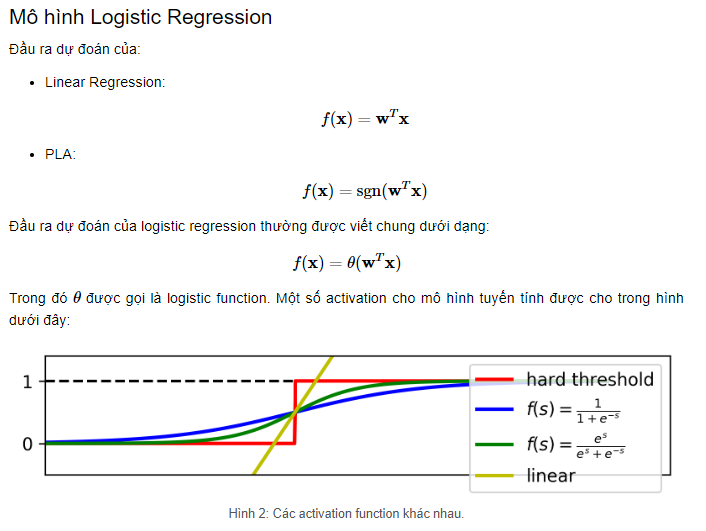

In [19]:
from IPython import display
display.Image("./utils/log_res.png")

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# https://www.miai.vn/2020/06/16/oanh-gia-model-ai-theo-cach-mi-an-lien-chuong-2-precision-recall-va-f-score/

In [21]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

# predict
predictions = regressor.predict(X_test)
# evaluate
print("LR classification accuracy", accuracy_score(y_test, predictions))

# matrix confusion
cm = confusion_matrix(y_test, predictions)
print(cm)

# f1 score
print("LR f1 score", f1_score(y_test, predictions, average="macro"))

LR classification accuracy 0.7930327868852459
[[ 55   6   1   2   1   2   0]
 [ 13 136   1   0   1   2   5]
 [  1   7  65   1   1   1   1]
 [  2   2   2  18   0   2   8]
 [  2   5   2   0  21   1   2]
 [  2   1   2   3   2  45   2]
 [  1   5   2   4   0   3  47]]
LR f1 score 0.7576601646430857


In [22]:
# print the coefficients
print("regressor.coef_", regressor.coef_)
print("regressor.coef_.shape", regressor.coef_.shape)


print("regressor.intercept_", regressor.intercept_)
print("regressor.intercept_.shape", regressor.intercept_.shape)

regressor.coef_ [[ 0.03221266 -0.12289695  0.08815992 ... -0.10230206  0.20477801
   0.20135708]
 [ 0.54495421  0.18432733 -0.3054115  ... -0.02607878 -0.42399465
   0.14382144]
 [ 0.121423   -0.29241293 -0.22966988 ... -0.02155709 -0.27486844
  -0.0227118 ]
 ...
 [-0.14518046  0.05115239  0.31750283 ... -0.0060337  -0.03027071
  -0.06653983]
 [-0.19399563  0.37009965  0.01414277 ... -0.03192962  0.33307885
  -0.14051157]
 [-0.23114294 -0.37516938  0.22897758 ...  0.20017505 -0.14531693
  -0.07811123]]
regressor.coef_.shape (7, 1433)
regressor.intercept_ [ 0.68943604  1.30640456  0.54224626 -0.81727678 -1.56778459 -0.05836346
 -0.09466203]
regressor.intercept_.shape (7,)


# SVM

![1](https://drive.google.com/uc?export=view&id=1tJqGgvc9F0WQnLCKwgPzFvV9W2OXBNtu)

![2](https://drive.google.com/uc?export=view&id=1faRLlpvlCJXxsTjdxgcZAW4zagc6COJj)


![3](https://drive.google.com/uc?export=view&id=1TZg1E7eyN8uGcQUQcPqo5GORrcE4Lw3X)


![4](https://drive.google.com/uc?export=view&id=1dtLdySxYPgnx4q-yCYPjpWmf1nnbLEZI)

![4gif](https://drive.google.com/uc?export=view&id=1cHFyBm9kppzYGy1n-yRzfxZTlESwUW3N)

Trong trường hợp đường biên phân chia đúng mọi điểm điểm dữ liệu thì được gọi là bài toán phân loại theo đường biên cứng (hard margin classification)

![7](https://drive.google.com/uc?export=view&id=1l7xFjjeq1dojmBj95LxR9vTI0Bk6ERf5)
![77](https://drive.google.com/uc?export=view&id=1LkF-5fLwqJyR8UF5xAhjOj9SIvqxKs_6)

![8](https://drive.google.com/uc?export=view&id=1r5R1rRnP7taCArmvX-8I_L_PRxTvvIVT)
- trong đó C (>0) là tham số xác định mức độ phạt (penalty degree) đối với các lỗi → Giá trị C càng lớn, thì mức độ phạt càng cao đối với các lỗi

![5](https://drive.google.com/uc?export=view&id=1ERfbUB6IYjU_SEBbvPI3uGSQMsAge8Hb)

![6](https://drive.google.com/uc?export=view&id=1RFNjKKzqbw9cUb3vFHKiOj2azgjhG9CA)

![7](https://drive.google.com/uc?export=view&id=1UMqlanud9_HMAf4E4ihkSplA04zw2K7P)
![8](https://drive.google.com/uc?export=view&id=1mfBQdXCcBwdJemu8Mb1Oe5m2n--3asRo)
- z = x^2+ y^2.

In [23]:
# svm to classify
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("SVM accuracy: ", accuracy_score(y_test, y_pred))
print("SVM f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("SVM confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

SVM accuracy:  0.7663934426229508
SVM f1 score:  0.7653468326532188
SVM confusion matrix: 
[[ 55   5   1   2   1   2   1]
 [ 16 131   1   2   2   2   4]
 [  2  11  60   1   1   1   1]
 [  2   1   0  21   0   4   6]
 [  2   5   4   0  19   1   2]
 [  2   4   3   2   1  42   3]
 [  0   7   2   4   0   3  46]]


In [24]:
# turning hyperparameter for svm
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10],
                'gamma': [1, 0.1, 0.01],
                'kernel': ['rbf', 'linear', 'poly']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.297 total time=   4.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.297 total time=   3.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.300 total time=   3.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.300 total time=   4.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.301 total time=   4.4s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.682 total time=   1.7s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.746 total time=   1.6s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.779 total time=   1.8s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.705 total time=   1.6s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.725 total time=   2.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.551 total time=   4.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [25]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
# print accuracy score
print("SVM accuracy: ", accuracy_score(y_test, grid.predict(X_test)))
print("SVM f1 score: ", f1_score(y_test, grid.predict(X_test), average='weighted'))
print("SVM confusion matrix: ")
print(confusion_matrix(y_test, grid.predict(X_test)))

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)
SVM accuracy:  0.7725409836065574
SVM f1 score:  0.7718304330795098
SVM confusion matrix: 
[[ 54   7   1   2   1   1   1]
 [ 13 132   1   0   1   5   6]
 [  2  11  62   1   1   0   0]
 [  3   3   0  20   0   2   6]
 [  1   8   2   0  21   0   1]
 [  2   4   1   3   0  45   2]
 [  2   9   2   3   0   3  43]]


# Random forests

![1](https://drive.google.com/uc?export=view&id=1jgY7VTED5xEfl6IHWDoQxbx4ihHMc7WJ)

![3](https://drive.google.com/uc?export=view&id=1TgMGZv5hLPy5l47ZcogmxW0u4K4gm-wh)

![1](https://drive.google.com/uc?export=view&id=1-dkPUl1rjnbHfmMqAc6jm1XxsQIIHPCd)


![2](https://drive.google.com/uc?export=view&id=1apu4iJgLbgXQTCetbDeTzkL7CbofR9bo)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [27]:
# create classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# train model
clf.fit(X_train, y_train)

# predict
y_pred = clf.predict(X_test)

# evaluate
print("RF accuracy: ", accuracy_score(y_test, y_pred))
print("RF f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("RF confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

RF accuracy:  0.8012295081967213
RF f1 score:  0.7984185947506828
RF confusion matrix: 
[[ 57   6   0   0   0   3   1]
 [ 10 141   0   0   1   1   5]
 [  3   6  67   0   1   0   0]
 [  2   4   2  17   0   1   8]
 [  3   4   1   0  24   1   0]
 [  3   6   1   1   0  43   3]
 [  2  10   2   3   0   3  42]]


In [28]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [100,200,300]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'min_samples_split': min_samples_split}

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [29]:
# print best parameter after tuning
print(rf_random.best_params_)
# print how our model looks after hyper-parameter tuning
print(rf_random.best_estimator_)
# print accuracy score
print("RF accuracy: ", accuracy_score(y_test, rf_random.predict(X_test)))
print("RF f1 score: ", f1_score(y_test, rf_random.predict(X_test), average='weighted'))
print("RF confusion matrix: ")
print(confusion_matrix(y_test, rf_random.predict(X_test)))

{'n_estimators': 300, 'min_samples_split': 2, 'max_features': 'auto'}
RandomForestClassifier(max_features='auto', n_estimators=300, random_state=0)
RF accuracy:  0.8012295081967213
RF f1 score:  0.7996175934731945
RF confusion matrix: 
[[ 57   6   0   0   1   2   1]
 [ 12 139   0   0   1   1   5]
 [  2   8  66   0   1   0   0]
 [  1   4   1  18   0   2   8]
 [  3   4   1   0  24   1   0]
 [  3   4   1   1   0  43   5]
 [  2   8   2   3   0   3  44]]


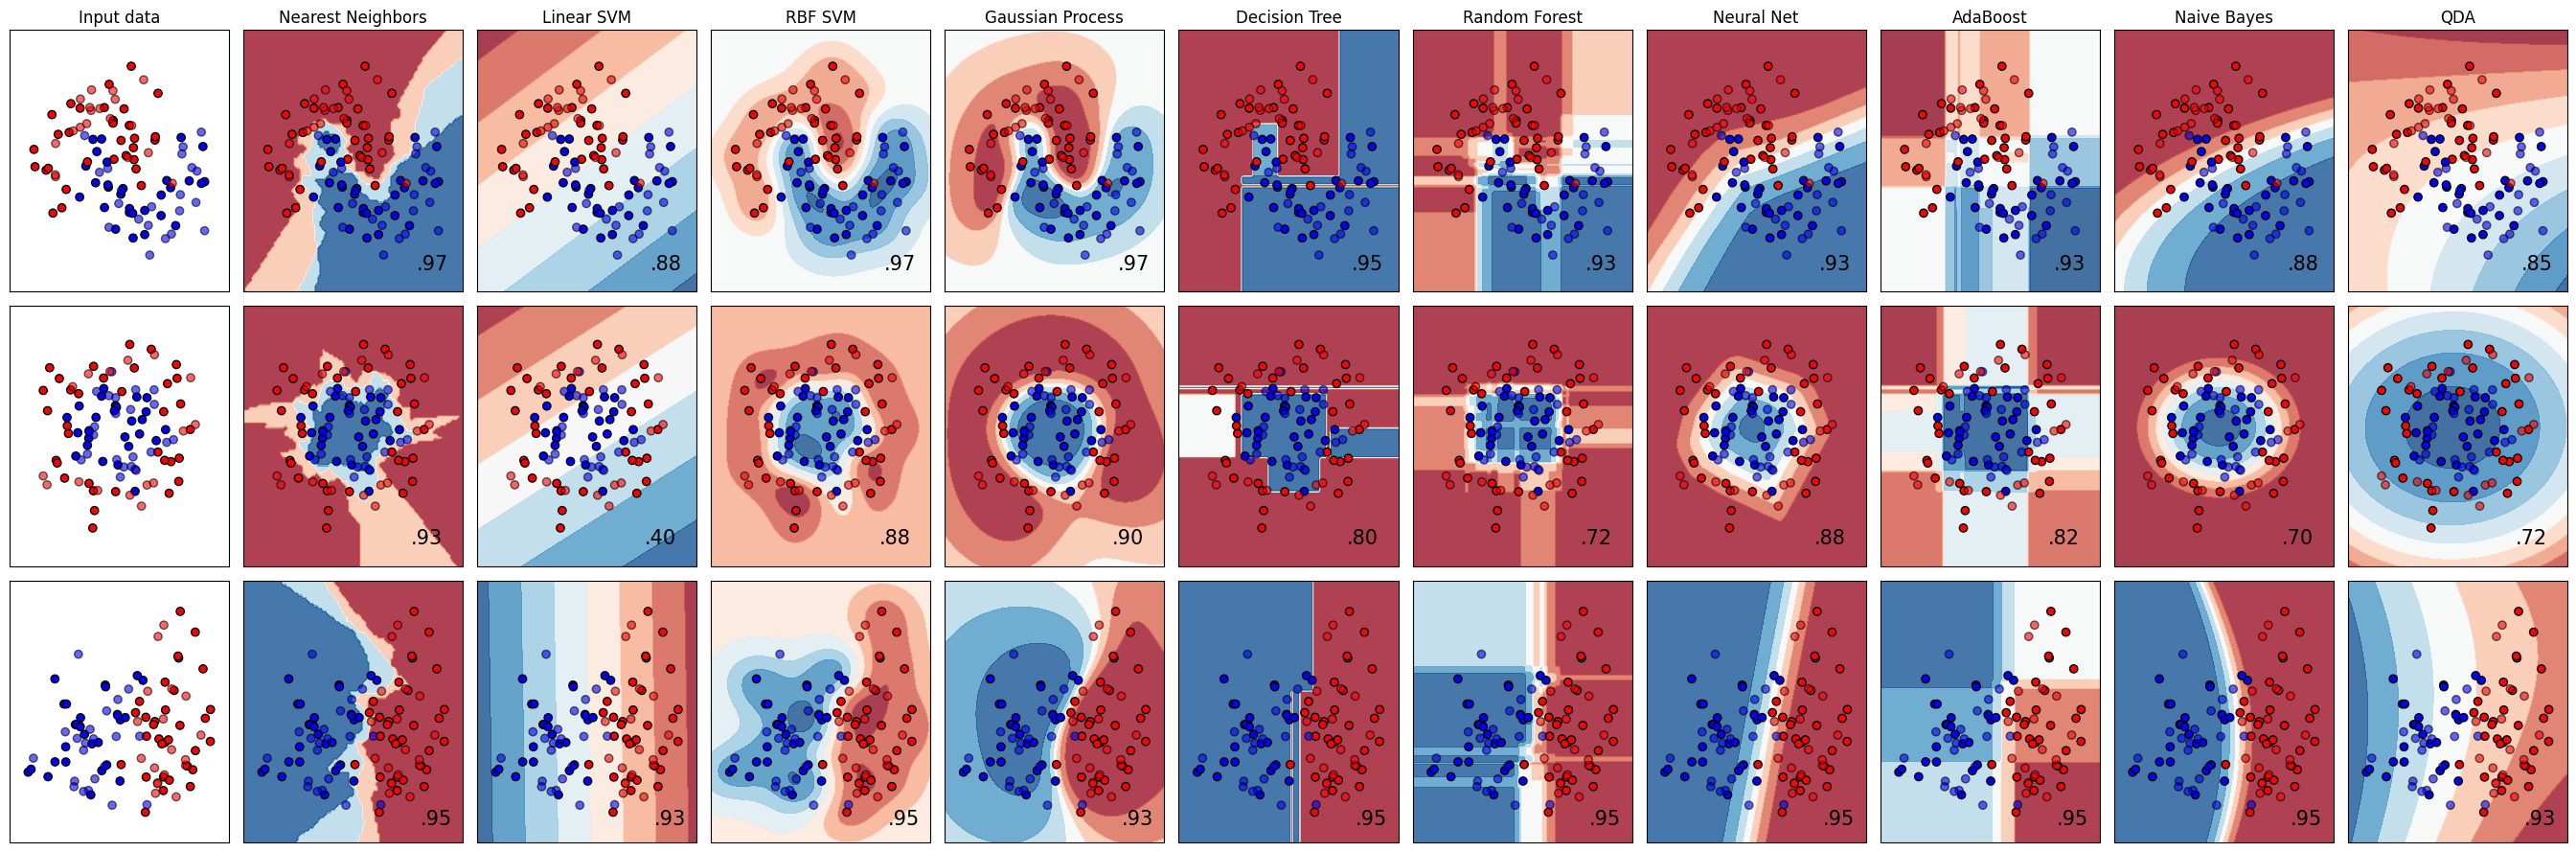

In [31]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

# names = [
#     "Nearest Neighbors",
# ]

# classifiers = [
#     KNeighborsClassifier(3),
# ]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()